Exercise Basics Data Mining
===========================



## Exercise 1: Statistical description of data



Let there be a small data set with one feature: $(8, 2, 4, 5, 1, 2, 6)$

1.  Calculate the following statistical features by hand!
    (Please do NOT use Python or any calculator, see `quantiles-handout.pdf` for a refresher on quantiles):
    -   mean value
    -   median
    -   quantile $Q_{0.25}$
    -   quantile $Q_{0.75}$

2.  Now use Python to calculate the statistical features. You can use the NumPy function `np.quantile()`
    or the member function `quantile()` of a Pandas DataFrame.

3.  Manually draw (by hand!) a histogram with bins of width 2 (bins: (0,2] , (2,4] ,&#x2026;)

4.  Now use Python to plot the histogram. Do you get the same result?



mean value: 4.0
median:  4.0
25%-quantile:  2.0
75%-quantile:  5.5


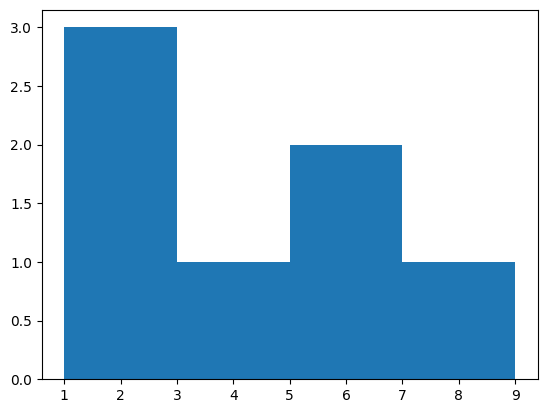

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([8, 2, 4, 5, 1, 2, 6])
bin_width = 2

print("mean value:", np.mean(data))
print("median: ", np.median(data))
print("25%-quantile: ", np.quantile(data, .25))
print("75%-quantile: ", np.quantile(data, .75))

fig, ax = plt.subplots()
plt.hist(data, bins=range(min(data), max(data) + bin_width, bin_width))
plt.show()

## Exercise 2: Project understanding and Data understanding



First download the wine dataset from Moodle (wine.csv).
You can read a CSV with pandas using `pandas.from_csv`. Importing pandas is achieved
with



In [15]:
import pandas as pd
df = pd.read_csv('./wine.csv')

Using `pd` as alias is a convention.



### Project and data understanding



**Project Goal**: Using chemical analysis to determine the origin of wines using the „wine“ data set.

Your data to solve the task:

-   3 different types of Italian wine
-   number of instances:  180
-   number of features: 13
-   number of classes: 3

-   features:
    -   Alcohol
    -   Malic acid
    -   Ash
    -   Alcalinity of ash
    -   Magnesium
    -   Total phenols
    -   Flavanoids
    -   Nonflavanoid phenols
    -   Proanthocyanins
    -   Color intensity
    -   Hue
    -   OD280/OD315 of diluted wines
    -   Proline

-   one column „class“: with the types of wine ${1, 2, 3}$

Read the csv-file with the wine data set in a Pandas data frame.

1.  Check if all data objects and features are available, compare the number of lines with the description above.
2.  Check the types of your attributes (there is one column where it does not make sense),
3.  also check for duplicates and missing values.
    If you find duplicates or missing values remove the corresponding objects.

**Hints**:

-   There is one column with a non-sense value in it.
-   If a file is read with `pd.read_csv` the types of each column are determined automatically (if possible).

It might happen that there are different types in one column.
As the documentation tells us: **Columns with mixed types are stored with the object dtype**.

-   Duplicates can be removed with the method `DataFrame.duplicated()`.
-   Missing values can be found with `DataFrame.isnull()`.
-   Missing values can dropped with `DataFrame.dropna()`.

**Important**: Check the dtype of the columns at the end. You can use the member function `astype` of a column to cast
its value (e.g. `df.Ash=df.Ash.astype(np.float64)`).



In [16]:
# check dataframe informations
df.info() # 181 entries - header = 180; 14 columns - index = 13
print("Number of classes: ", df['class'].unique()) # 3 classes [1 2 3]

# clean dataframe
df['Ash'] = pd.to_numeric(df['Ash'], errors='coerce')
df = df.drop_duplicates(keep = 'first')
df = df.dropna()

# cast type of 'Ash' column into np.float64
df['Ash'] = df['Ash'].astype(np.float64)

# show cleaned dataframe information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         181 non-null    int64  
 1   Alcohol                       181 non-null    float64
 2   Malic acid                    181 non-null    float64
 3   Ash                           181 non-null    object 
 4   Alcalinity of ash             181 non-null    float64
 5   Magnesium                     181 non-null    int64  
 6   Total phenols                 181 non-null    float64
 7   Flavanoids                    181 non-null    float64
 8   Nonflavanoid phenols          181 non-null    float64
 9   Proanthocyanins               181 non-null    float64
 10  Color intensity               181 non-null    float64
 11  Hue                           181 non-null    float64
 12  OD280/OD315 of diluted wines  181 non-null    float64
 13  Proli

### Data understanding and preparation, visualization



There are outliers in the data set (hint: 4 obvious outliers in one column, which you will find without having any background in chemistry).

-   Find the outliers and remove the entire instances (the entire rows).
    You can use Python commands and visualization (e.g. histograms or box plots). Which outliers did you find?

**Hints**:

-   The function `DataFrame.describe()` is useful, check out the argument `percentiles`.
-   Make a boxplot of the suspicious column with the member function (`.plot.box()`).



In [17]:
# fig, ax = plt.subplot()
print(df.describe())
print("Alcohol outliers: ", df[(df['Alcohol'] > 50) | (df['Alcohol'] < 0)].count())
df = df[(df['Alcohol'] >= 0) & (df['Alcohol'] <= 50)]
df.describe()

            class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.600955    2.336348    2.366517          19.494944   
std      0.775035    9.037902    1.117146    0.274344           3.339564   
min      1.000000  -13.400000    0.740000    1.360000          10.600000   
25%      1.000000   12.332500    1.602500    2.210000          17.200000   
50%      2.000000   13.040000    1.865000    2.360000          19.500000   
75%      3.000000   13.687500    3.082500    2.557500          21.500000   
max      3.000000   94.130000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,1.913793,12.989310,2.304540,2.364310,19.440230,99.517241,2.307126,2.059368,0.358966,1.595460,4.967471,0.965092,2.635287,746.908046
std,0.766747,0.815654,1.105147,0.275778,3.344963,14.275864,0.627341,0.990057,0.124074,0.578091,2.259513,0.225376,0.700567,318.060765
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.345000,1.592500,2.210000,17.125000,88.000000,1.757500,1.250000,0.262500,1.242500,3.180000,0.800000,2.020000,500.000000
50%,2.000000,13.040000,1.830000,2.360000,19.250000,98.000000,2.400000,2.170000,0.335000,1.560000,4.600000,0.980000,2.795000,666.000000
75%,2.750000,13.677500,3.020000,2.557500,21.500000,107.000000,2.800000,2.887500,0.430000,1.957500,6.075000,1.120000,3.177500,988.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Exercise 3: Use simple grouping to understand and classify data



There are many features for each class. A useful  feature to classify wine
is such that it behaves differently for different classes.
First, let us check the mean of each class. Using the pandas
`groupby` function (member function of a DataFrame), you can
compute aggregate functions of groups. Use this to compute the
mean of each feature for each group (e.g., `df.groupby(COLUMN).mean()`).
If you found an interesting column, the following command
vizualizes the distribution for the different classes.



In [18]:
import seaborn as sns
# sns.displot(data=df, x=column, hue='class', kind='kde')